In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from pandas.plotting import table as mpl_table
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency, fisher_exact
from scipy.stats import mannwhitneyu
from plottable import Table
pastel_colors = ["#C1E1C1", "#FFD1DC"]

In [69]:
df=pd.read_csv(r"D:\Data Analysis - BC - Quera\Mini Project\social_anxiety_dataset.csv")

In [70]:
df.head(10)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),Target,is_Anxious,Therapy History
0,59.0,Other,Teacher,7.0,2.4,40.0,5,Yes,No,4,...,5,No,No,0,Yes,1.0,2.0,0,0,Group Therapy
1,46.0,Female,Student,5.1,5.4,156.0,11,NaN,No,3,...,4,Yes,No,2,No,1.0,4.0,0,0,NaN
2,40.0,Other,Lawyer,5.1,1.9,570.0,14,Yes,Yes,9,...,3,No,No,6,Yes,4.0,9.0,1,1,NaN
3,40.0,Male,Nurse,7.6,0.9,129.0,0,No,No,9,...,2,No,NaN,2,No,2.0,6.0,0,0,NaN
4,26.0,Male,Other,6.7,3.0,64.0,13,No,No,15,...,4,No,Yes,0,Yes,4.0,3.0,0,0,NaN
5,53.0,Male,Student,8.7,4.8,324.0,0,Yes,Yes,1,...,5,Yes,NaN,1,Yes,8.0,1.0,0,0,NaN
6,32.0,Male,Nurse,5.9,2.0,318.0,12,No,Yes,7,...,4,No,Yes,4,No,10.0,5.0,0,0,NaN
7,36.0,Male,Musician,6.4,4.0,230.0,4,NaN,Yes,1,...,2,Yes,No,3,Yes,7.0,1.0,0,0,NaN
8,56.0,Other,Engineer,3.2,4.5,436.0,1,No,Yes,2,...,3,No,Yes,2,No,3.0,3.0,0,0,NaN
9,27.0,Other,Artist,-10.0,2.4,NaN,6,Yes,No,7,...,1,Yes,Yes,1,No,7.0,3.0,0,0,NaN


In [71]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

2030 rows and 22 columns


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1968 non-null   float64
 1   Gender                             1911 non-null   object 
 2   Occupation                         2030 non-null   object 
 3   Sleep Hours                        1994 non-null   float64
 4   Physical Activity (hrs/week)       2030 non-null   float64
 5   Caffeine Intake (mg/day)           1936 non-null   float64
 6   Alcohol Consumption (drinks/week)  2030 non-null   int64  
 7   Smoking                            1924 non-null   object 
 8   Family History of Anxiety          2030 non-null   object 
 9   Stress Level (1-10)                2030 non-null   int64  
 10  Heart Rate (bpm)                   2030 non-null   int64  
 11  Breathing Rate (breaths/min)       2030 non-null   int64

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1968.0,39.921748,13.243754,18.0,29.00,40.0,51.0,64.0
Sleep Hours,1994.0,6.424624,2.161544,-10.0,5.80,6.7,7.5,11.0
Physical Activity (hrs/week),2030.0,2.800246,2.233899,-10.0,1.40,2.8,4.2,9.2
Caffeine Intake (mg/day),1936.0,306.275826,208.012717,0.0,177.75,277.5,391.0,1500.0
Alcohol Consumption (drinks/week),2030.0,9.490148,6.028653,-10.0,5.00,10.0,15.0,19.0
Stress Level (1-10),2030.0,6.028571,3.137269,1.0,3.00,6.0,9.0,15.0
Heart Rate (bpm),2030.0,93.066502,23.313430,60.0,76.00,93.0,107.0,220.0
Breathing Rate (breaths/min),2030.0,20.955665,5.182524,12.0,17.00,21.0,26.0,29.0
Sweating Level (1-5),2030.0,3.095567,1.392697,1.0,2.00,3.0,4.0,5.0
Therapy Sessions (per month),2030.0,2.359113,2.148642,0.0,1.00,2.0,3.0,10.0


In [74]:
categorical_columns = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 
                       'Dizziness', 'Medication', 'Recent Major Life Event', 'Therapy History']

In [75]:
def categorical_data_summary(data, columns):
    
    summary_df = pd.DataFrame()
    
    for column in columns :
        summary_df[column] = {
            'Count' : data[column].count(),   
            'Mode'  : data[column].mode()[0],
            'Unique': len(data[column].unique())
        }
    return summary_df.T

categorical_data_summary(df, categorical_columns)

,Count,Mode,Unique
Gender,1911,Female,4
Occupation,2030,Student,13
Smoking,1924,Yes,3
Family History of Anxiety,2030,Yes,2
Dizziness,2030,Yes,2
Medication,1921,Yes,3
Recent Major Life Event,2030,Yes,2
Therapy History,203,No previous history,5


In [76]:
missing_table = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct":  (df.isna().mean()*100).round(2),
    "non_missing":  df.notna().sum(),
    "dtype":        df.dtypes.astype(str)
}).sort_values("missing_count", ascending=False)

missing_table[missing_table['missing_count']>0]

,missing_count,missing_pct,non_missing,dtype
Therapy History,1827,90.00,203,object
Gender,119,5.86,1911,object
Medication,109,5.37,1921,object
Smoking,106,5.22,1924,object
Caffeine Intake (mg/day),94,4.63,1936,float64
Diet Quality (1-10),78,3.84,1952,float64
Age,62,3.05,1968,float64
Sleep Hours,36,1.77,1994,float64


In [77]:
print("-------------duplicated-------------")
print(f"we have {df.duplicated().sum()} duplicated records")

-------------duplicated-------------
we have 0 duplicated records


In [78]:
print("-------------unique values-------------")
df.nunique()

-------------unique values-------------


Age                                   47
Gender                                 3
Occupation                            13
Sleep Hours                           76
Physical Activity (hrs/week)          89
Caffeine Intake (mg/day)             544
Alcohol Consumption (drinks/week)     23
Smoking                                2
Family History of Anxiety              2
Stress Level (1-10)                   11
Heart Rate (bpm)                      61
Breathing Rate (breaths/min)          18
Sweating Level (1-5)                   5
Dizziness                              2
Medication                             2
Therapy Sessions (per month)          11
Recent Major Life Event                2
Diet Quality (1-10)                   10
Anxiety Level (1-10)                  10
Target                                 2
is_Anxious                             2
Therapy History                        4
dtype: int64

In [79]:
def univariate_analysis(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        fig, ax = plt.subplots(2, 2, figsize=(10, 6))
        sns.histplot(data=dataframe, x=col_name, ax=ax[0,0])
        ax[0,0].set_title(f'{col_name} distribution')
        sns.kdeplot(data=dataframe, x=col_name, ax=ax[0,1])
        ax[0,1].set_title(f'{col_name} density')
        sm.qqplot(dataframe[col_name], line='s', ax=ax[1,0])
        ax[1,0].set_title("QQ-Plot")
        sns.boxplot(data=dataframe, x=col_name,showmeans=True ,ax=ax[1,1])
        ax[1,1].set_title(f'{col_name} Boxplot ')

    else:
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        values=dataframe[col_name].value_counts()
        values.plot(kind='bar' ,ax=ax[0])
        plt.xlabel(col_name)
        dataframe[col_name].value_counts().plot.pie(
            autopct='%1.1f%%', ax=ax[1], ylabel=''
        )
        ax[1].set_title(f' {col_name} Pie chart')
        counts = dataframe[col_name].value_counts().reset_index()
        display(counts)
    
    plt.tight_layout()
    plt.show()
    

In [80]:
def bivariate_analysis(dataframe,col_name,target_col="Target"):
    
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        fig, ax = plt.subplots(1, 2, figsize=(10, 6))
        sns.boxplot(
        data=dataframe,
        x=target_col,   
        y=col_name,         
        showmeans=True,ax=ax[0])
        sns.violinplot(
        data=dataframe,
        x=target_col,   
        y=col_name,         
        showmeans=True,ax=ax[1])
        
    
    else:
        fig, ax = plt.subplots(1, 2, figsize=(18, 6))
        sns.countplot(
        data=dataframe,
        x=col_name,
        hue=target_col,
        palette="dark",
        
        alpha=0.6,
        ax=ax[0]
        )
        ax[0].set_title(f'Countplot of {col_name} by {target_col}')
        sns.histplot(
        data=dataframe,
        x=col_name,
        hue=target_col,
        multiple="fill",
        stat="proportion",
        discrete=True,
        shrink=.8,
        ax=ax[1]
        )
        ax[1].set_title(f'Proportion of {col_name} by {target_col}')
    plt.tight_layout()
    plt.show()

In [81]:
def χ2_test(df , column1 , column2):
    import pandas as pd
    from scipy.stats import chi2_contingency
    alpha=0.05
    table=pd.crosstab(df[column1] , df[column2])
    chi2, p, dof, expected = chi2_contingency(table)
    if p < alpha :
        print('رابطه معناداری بین دو متغیر وجود دارد')
    else:
        print('رابطه معناداری بین دو متغیر وجود ندارد')
    print('p_value is %f'%(p))

In [82]:
def mann_whitney(df, column1, column2= 'Target'):
    stat, p_value = mannwhitneyu(df[df['Target']==0][column1],df[df['Target']==1][column1])
    if p_value < 0.05:
        print(f'pvalue is equal to {p_value:.4f}')
        print('رابطه معناداری بین دو متغیر وجود دارد')
    else:
        print(f'pvalue is equal to {p_value:.4f}')
        print('رابطه معناداری بین دو متغیر وجود ندارد')

__Age__

_univariate analysis_

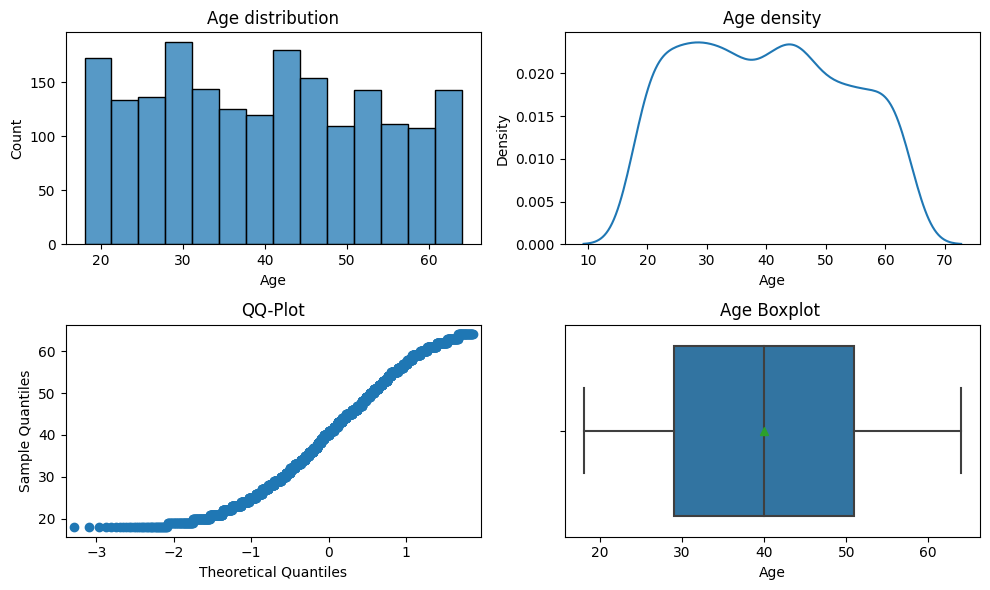

In [83]:
univariate_analysis(df, 'Age')

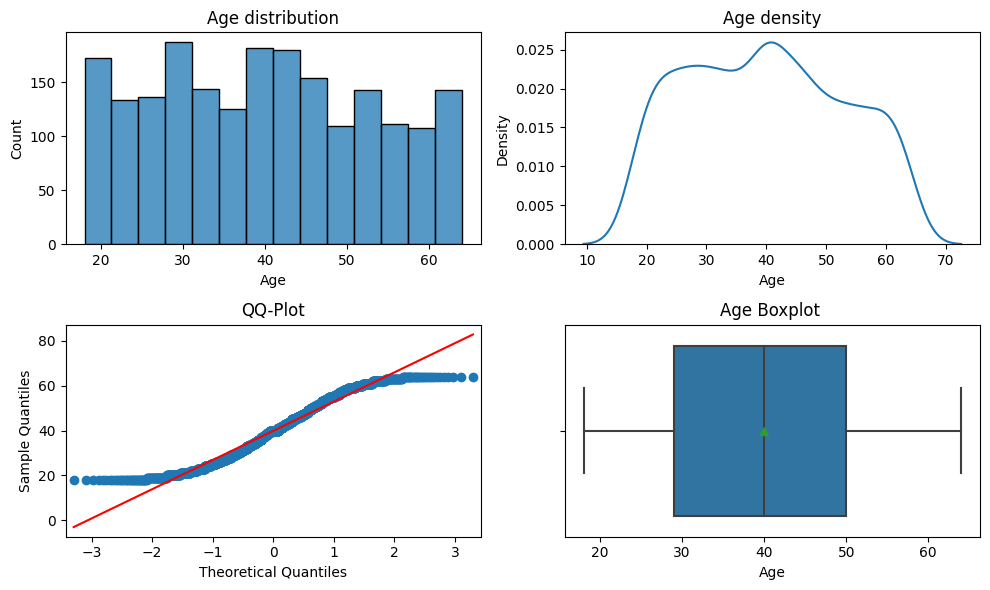

In [84]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
univariate_analysis(df, 'Age')

_bivariate analysis_

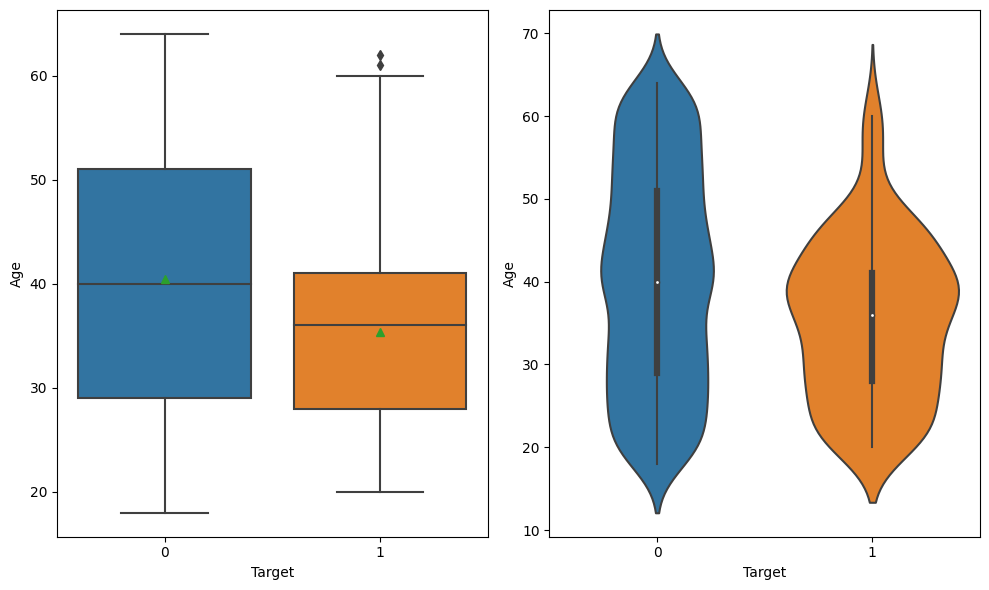

In [85]:
bivariate_analysis(df,'Age',target_col="Target")

_mannwhitneyu_

In [86]:
mann_whitney(df,'Age')

pvalue is equal to 0.0000
رابطه معناداری بین دو متغیر وجود دارد


_Binning_

,index,Age Group
0,Young,773
1,Senior,711
2,Adult,509


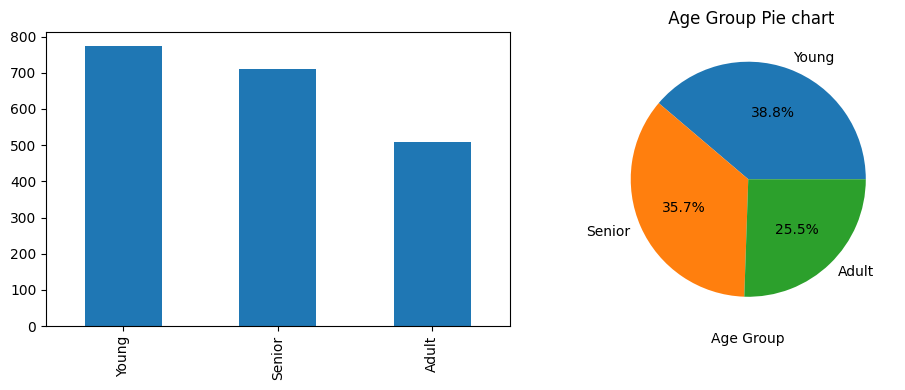

In [87]:
bins = [18,35,45,64]
labels = ['Young', 'Adult', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins= bins, labels= labels)
univariate_analysis(df, 'Age Group')

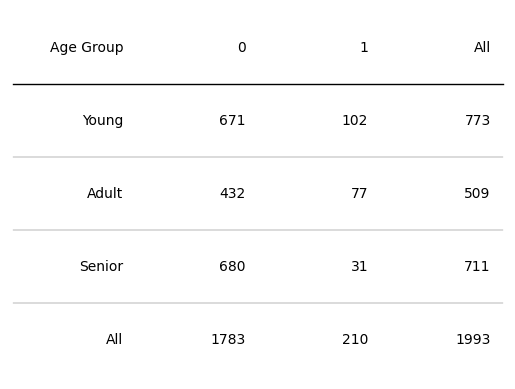

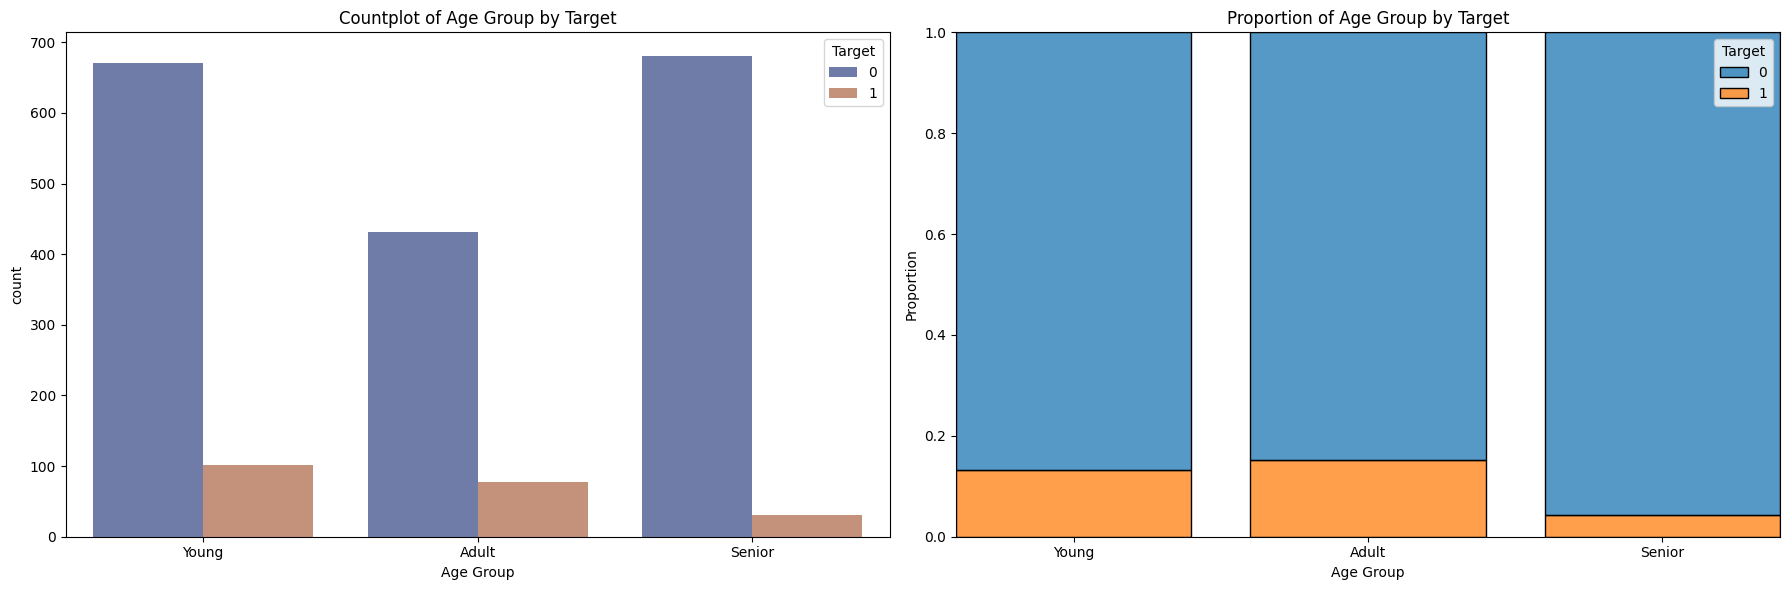

In [88]:
count = pd.crosstab(df['Age Group'],df['Target'], margins=True)
Table(count)
bivariate_analysis(df, 'Age Group')

__Gender__

_univariate analysis_

,index,Gender
0,Female,657
1,Other,627
2,Male,627


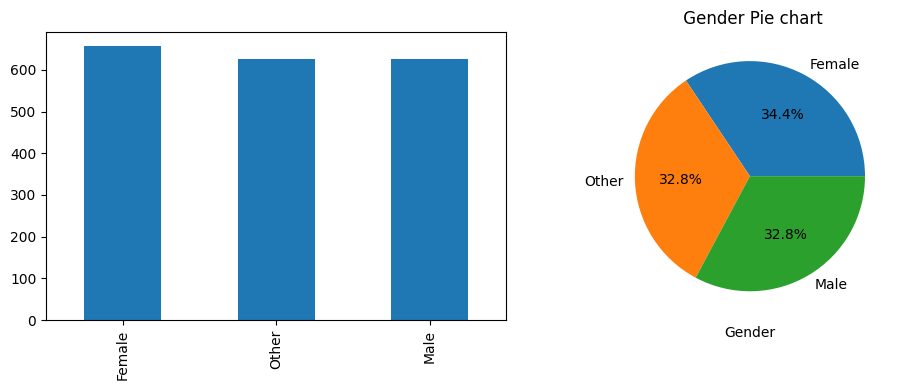

In [89]:
univariate_analysis(df, 'Gender')

In [90]:
df['Gender'].fillna('Other', inplace= True)

,index,Gender
0,Other,746
1,Female,657
2,Male,627


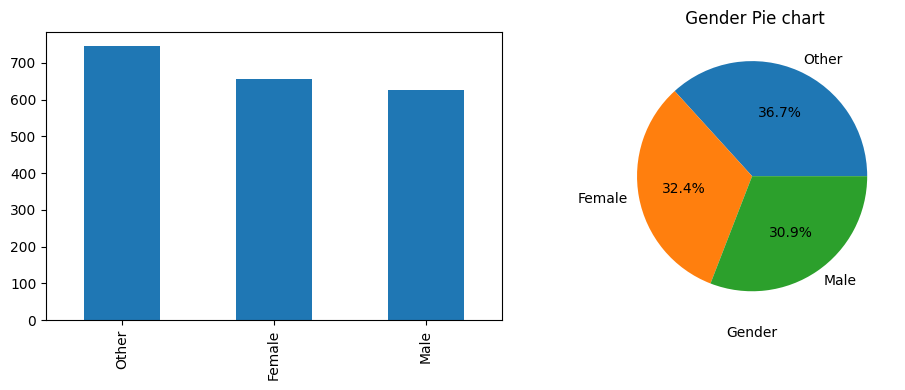

In [91]:
univariate_analysis(df, 'Gender')

_Bivariate analysis_

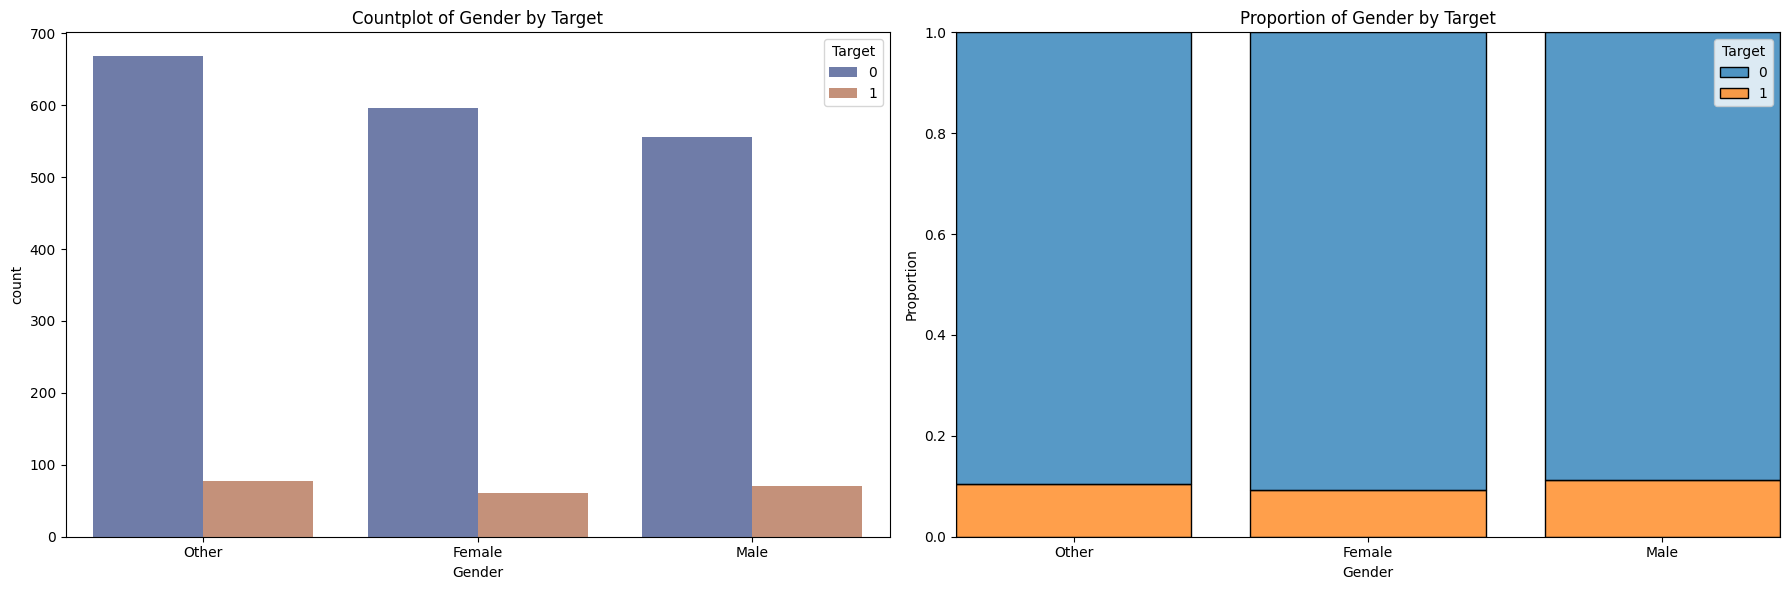

In [92]:
bivariate_analysis(df, 'Gender')

_Chi2 Test_

In [93]:
χ2_test(df,'Gender', 'Target')

رابطه معناداری بین دو متغیر وجود ندارد
p_value is 0.483359


__Occupation__

_univariate analysis_

,index,Occupation
0,Student,182
1,Artist,172
2,Lawyer,167
3,Musician,163
4,Nurse,162
5,Doctor,161
6,Scientist,155
7,Teacher,151
8,Other,149
9,Athlete,147


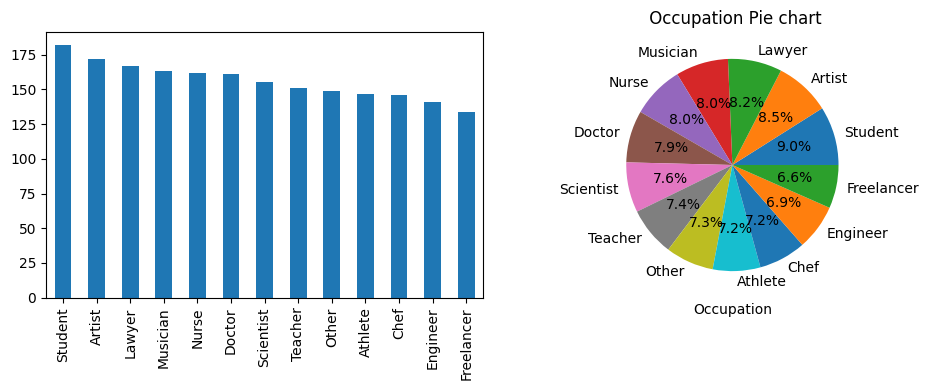

In [94]:
univariate_analysis(df, 'Occupation')

_Bivariate analysis_

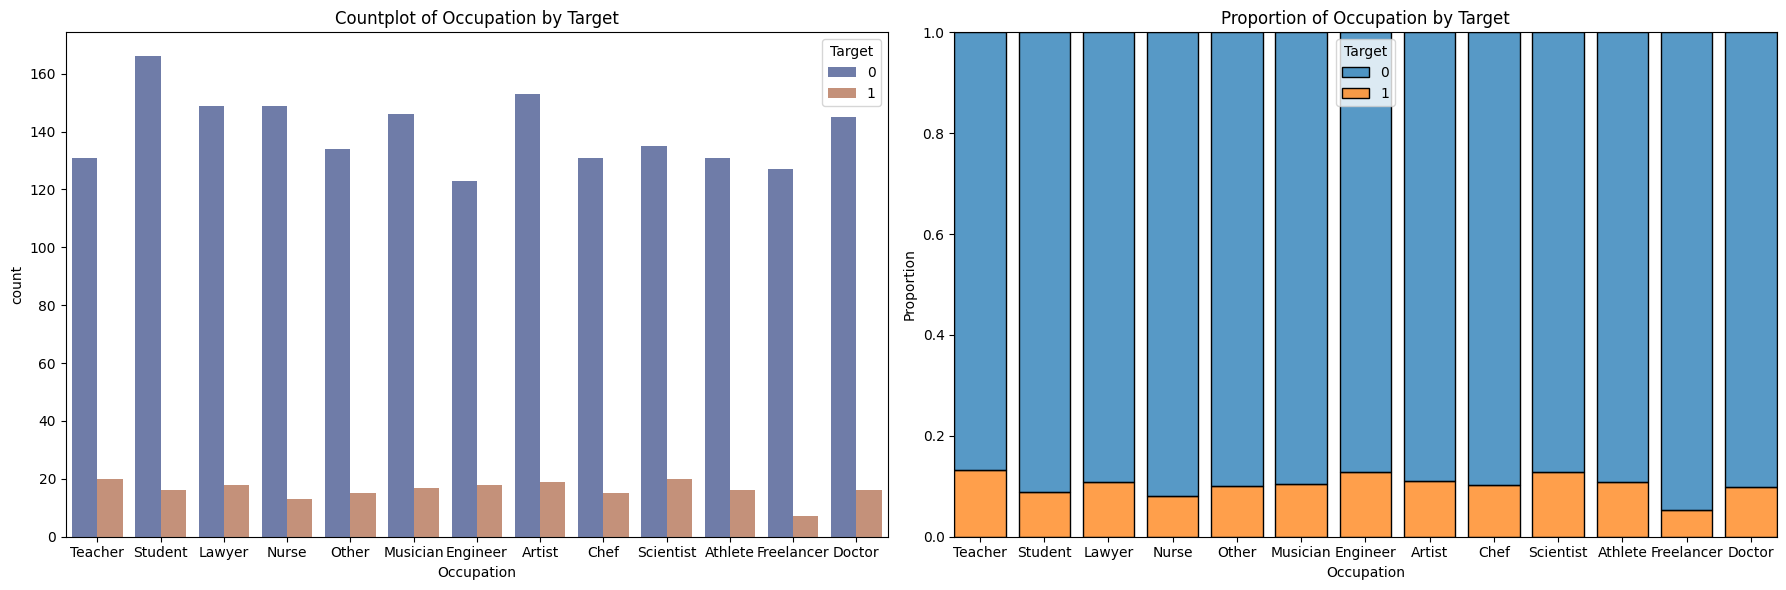

In [95]:
bivariate_analysis(df, 'Occupation')

_Chi2 Test_

In [96]:
χ2_test(df,'Occupation', 'Target')

رابطه معناداری بین دو متغیر وجود ندارد
p_value is 0.722297


_reclassifying_

,index,Occupation Group
0,Art,335
1,Education,333
2,Medical Staff,323
3,Science & Engineering,296
4,Other,149
5,Freelancer,134


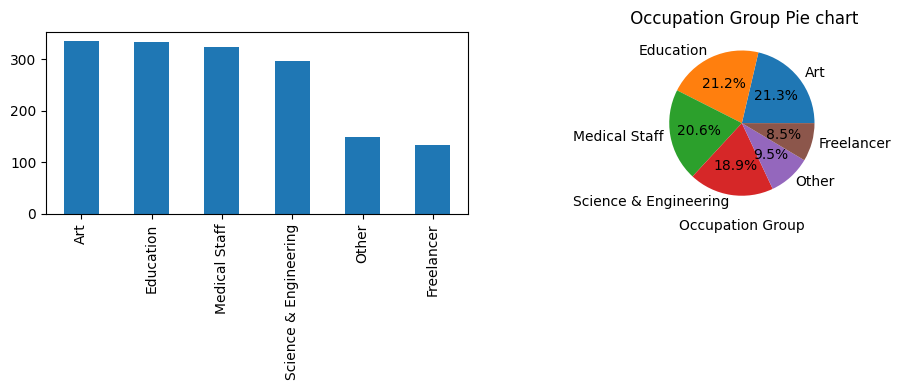

In [97]:

new_class = {'Student': 'Education',
             'Teacher': 'Education',
             'Artist': 'Art', 
             'Musician':'Art',
             'Legal': 'Lawyer',
             'Nurse':'Medical Staff',
             'Doctor':'Medical Staff',
             'Scientist':'Science & Engineering', 
             'Engineer':'Science & Engineering',
             'Resturant': 'Chef',
             'Sports': 'Athlete',
             'Freelancer': 'Freelancer',
             'Other': 'Other'}
df['Occupation Group'] = df['Occupation'].map(new_class)
univariate_analysis(df, 'Occupation Group')

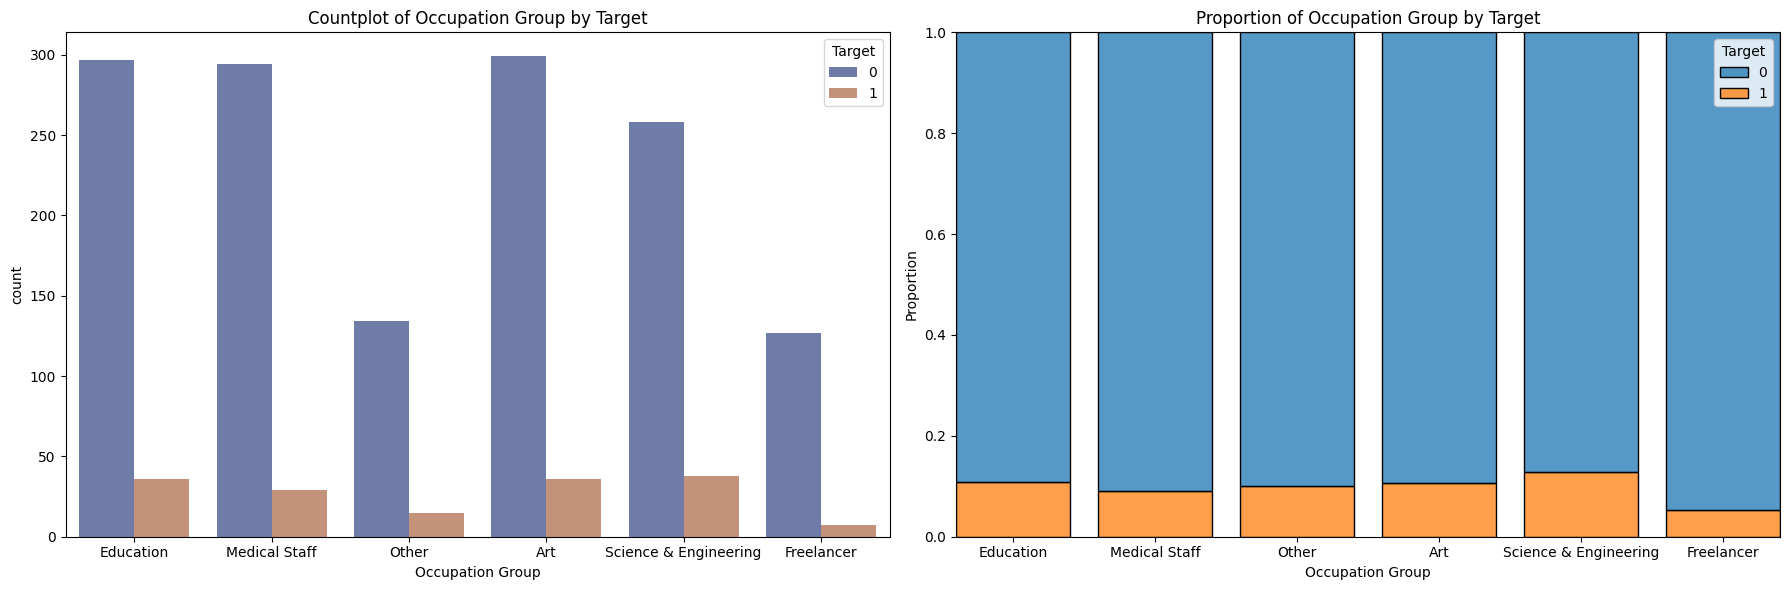

In [98]:
bivariate_analysis(df, 'Occupation Group')

In [99]:
χ2_test(df,'Occupation Group', 'Target')

رابطه معناداری بین دو متغیر وجود ندارد
p_value is 0.251424


__Sleep Hours__

_univariate analysis_

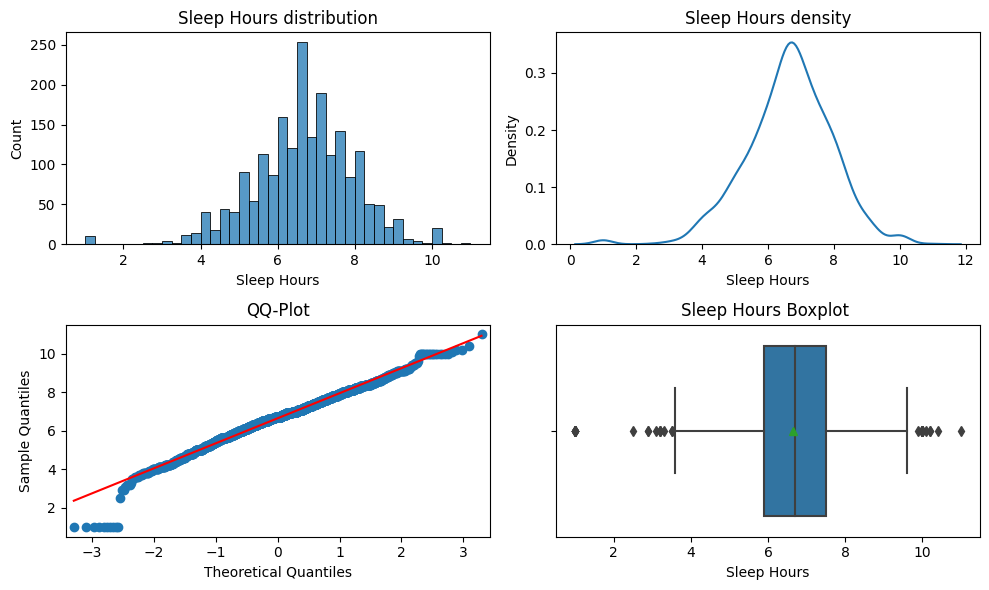

In [100]:
df['Sleep Hours'] = abs(df['Sleep Hours'])
df['Sleep Hours'].fillna(df['Sleep Hours'].mean(), inplace= True)
univariate_analysis(df, 'Sleep Hours')

_Bivariate analysis_

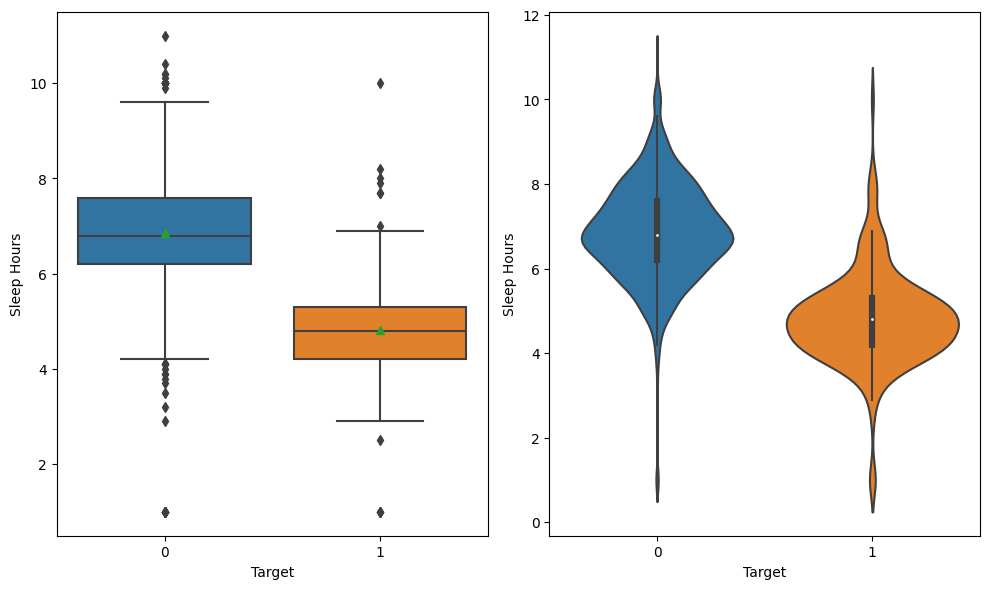

In [101]:
bivariate_analysis(df, 'Sleep Hours')

_mannwhitneyu_

In [102]:
mann_whitney(df, 'Sleep Hours')

pvalue is equal to 0.0000
رابطه معناداری بین دو متغیر وجود دارد


_Binning_

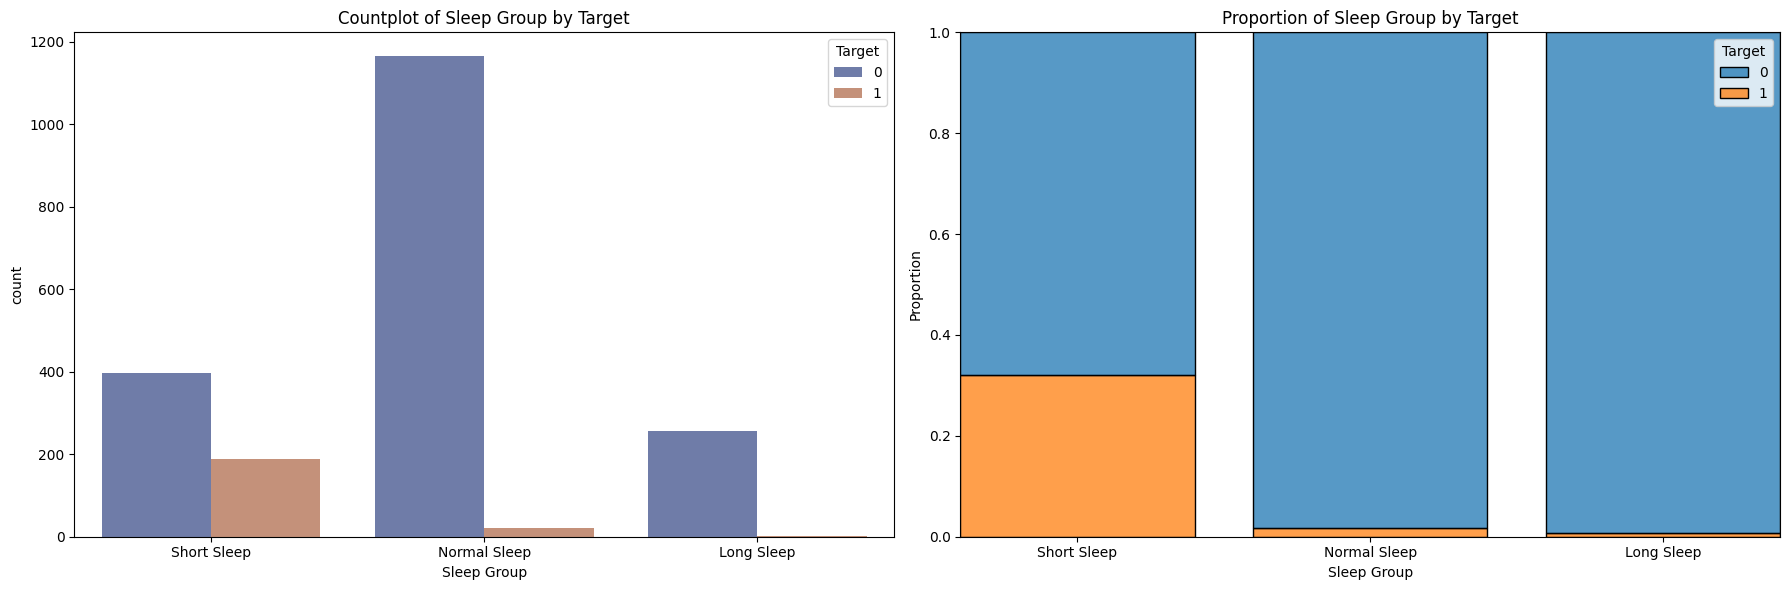

رابطه معناداری بین دو متغیر وجود دارد
p_value is 0.000000


In [103]:
bins = [0,6,8,11]
labels = ['Short Sleep', 'Normal Sleep', 'Long Sleep']
df['Sleep Group'] = pd.cut(df['Sleep Hours'], bins = bins, labels= labels)
bivariate_analysis(df, 'Sleep Group')
χ2_test(df,'Sleep Group', 'Target')

__Physical Activity (hrs/week)__

_univariate analysis_

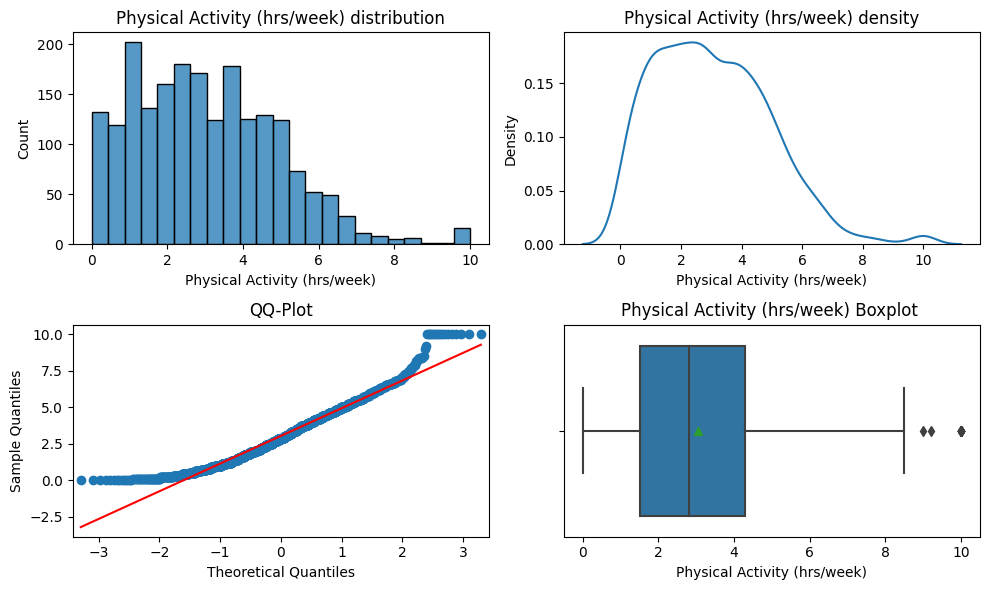

In [104]:
df['Physical Activity (hrs/week)'] = df['Physical Activity (hrs/week)'].abs()
univariate_analysis(df,'Physical Activity (hrs/week)')

_Bivariate analysis_

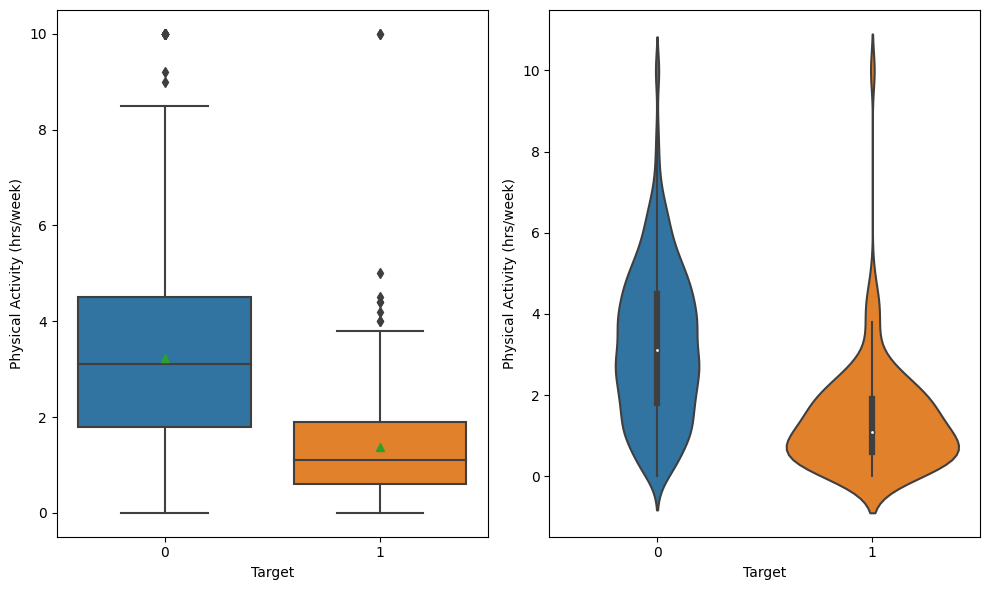

In [105]:
bivariate_analysis(df, 'Physical Activity (hrs/week)')

_mannwhitneyu_

In [106]:
mann_whitney(df,'Physical Activity (hrs/week)')

pvalue is equal to 0.0000
رابطه معناداری بین دو متغیر وجود دارد


_Binning_

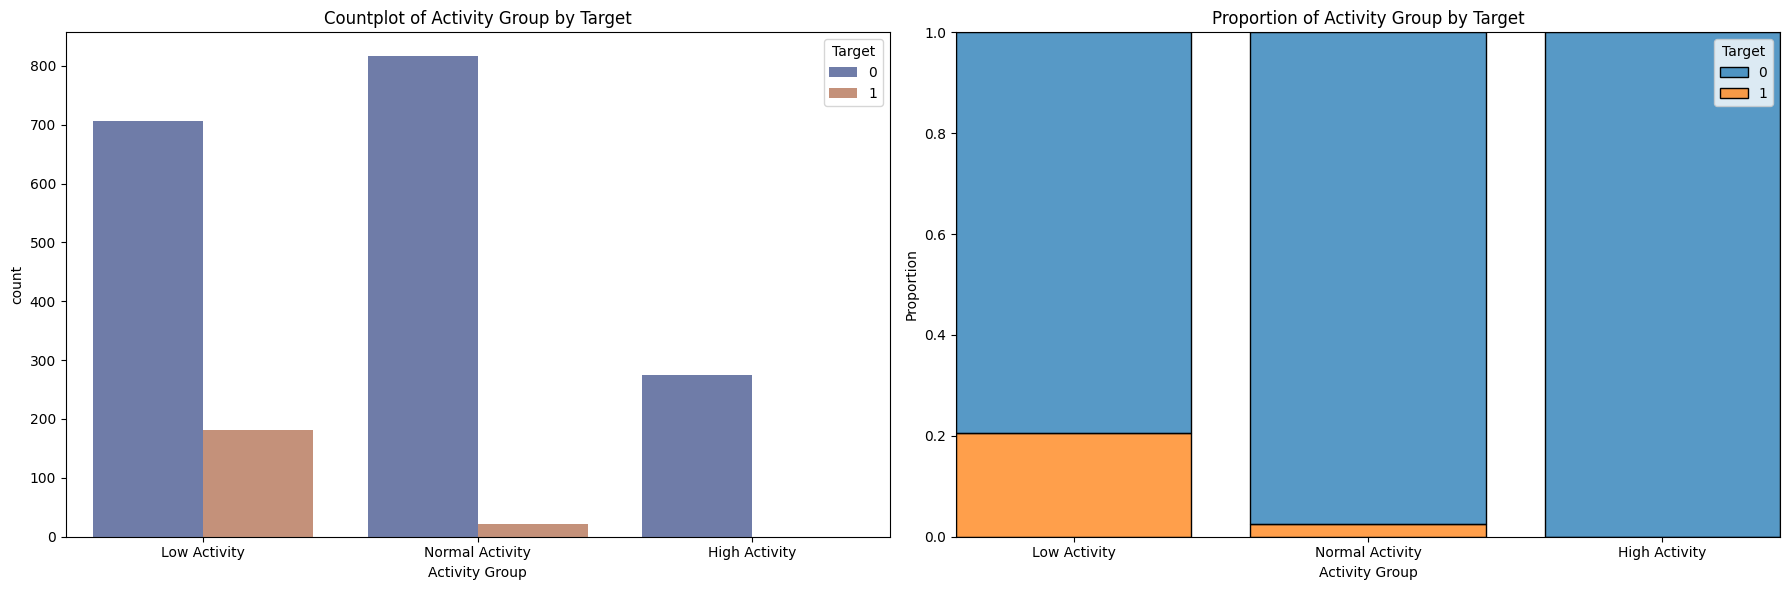

In [107]:
bins = [0,2.5,5,9.2]
labels = ['Low Activity', 'Normal Activity', 'High Activity']
df['Activity Group'] = pd.cut(df['Physical Activity (hrs/week)'], bins= bins, labels= labels)
bivariate_analysis(df, 'Activity Group')

In [108]:
χ2_test(df , 'Activity Group' , 'Target')

رابطه معناداری بین دو متغیر وجود دارد
p_value is 0.000000


__Caffeine Intake (mg/day)__

_univariate analysis_

In [109]:
check = df.groupby('Occupation')['Caffeine Intake (mg/day)'].mean()
pd.DataFrame(check).T

Occupation,Artist,Athlete,Chef,Doctor,Engineer,Freelancer,Lawyer,Musician,Nurse,Other,Scientist,Student,Teacher
Caffeine Intake (mg/day),208.329193,247.1875,280.906475,429.012739,453.112782,289.65873,450.15,200.707006,284.662252,211.678082,449.721854,278.94152,197.292857


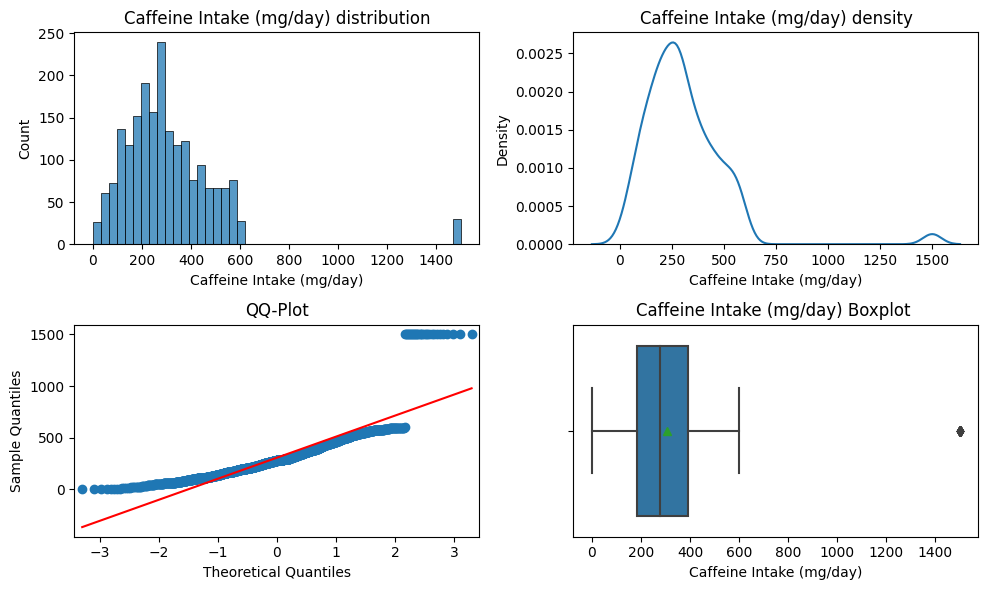

In [110]:
df['Caffeine Intake (mg/day)'].fillna(df.groupby('Occupation')['Caffeine Intake (mg/day)'].transform('mean'), inplace=True)
univariate_analysis(df, 'Caffeine Intake (mg/day)')

_Bivariate analysis_

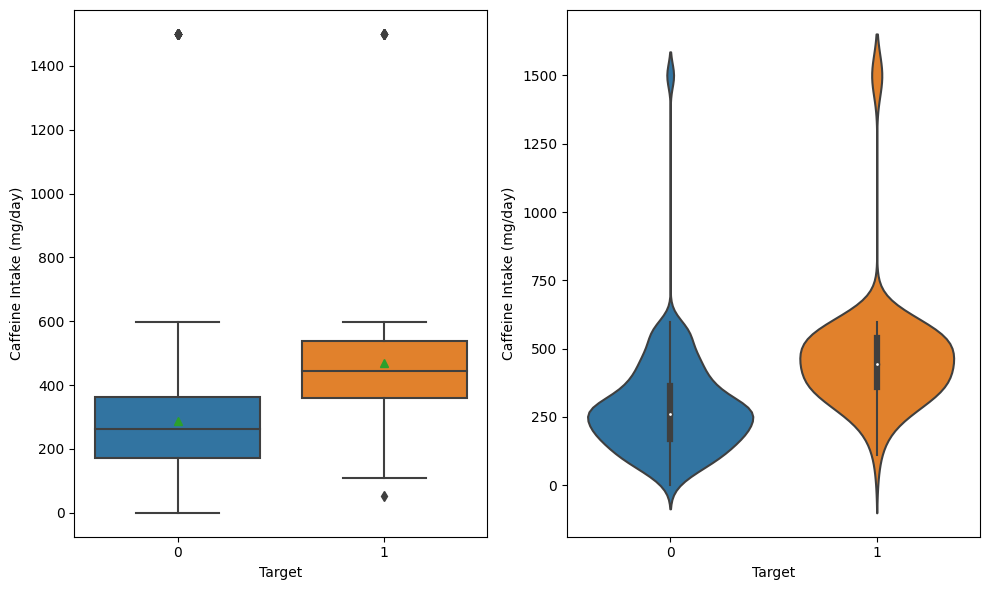

In [111]:
bivariate_analysis(df, 'Caffeine Intake (mg/day)')

_mannwhitneyu_

In [112]:
mann_whitney(df, 'Caffeine Intake (mg/day)')

pvalue is equal to 0.0000
رابطه معناداری بین دو متغیر وجود دارد


_Binning_

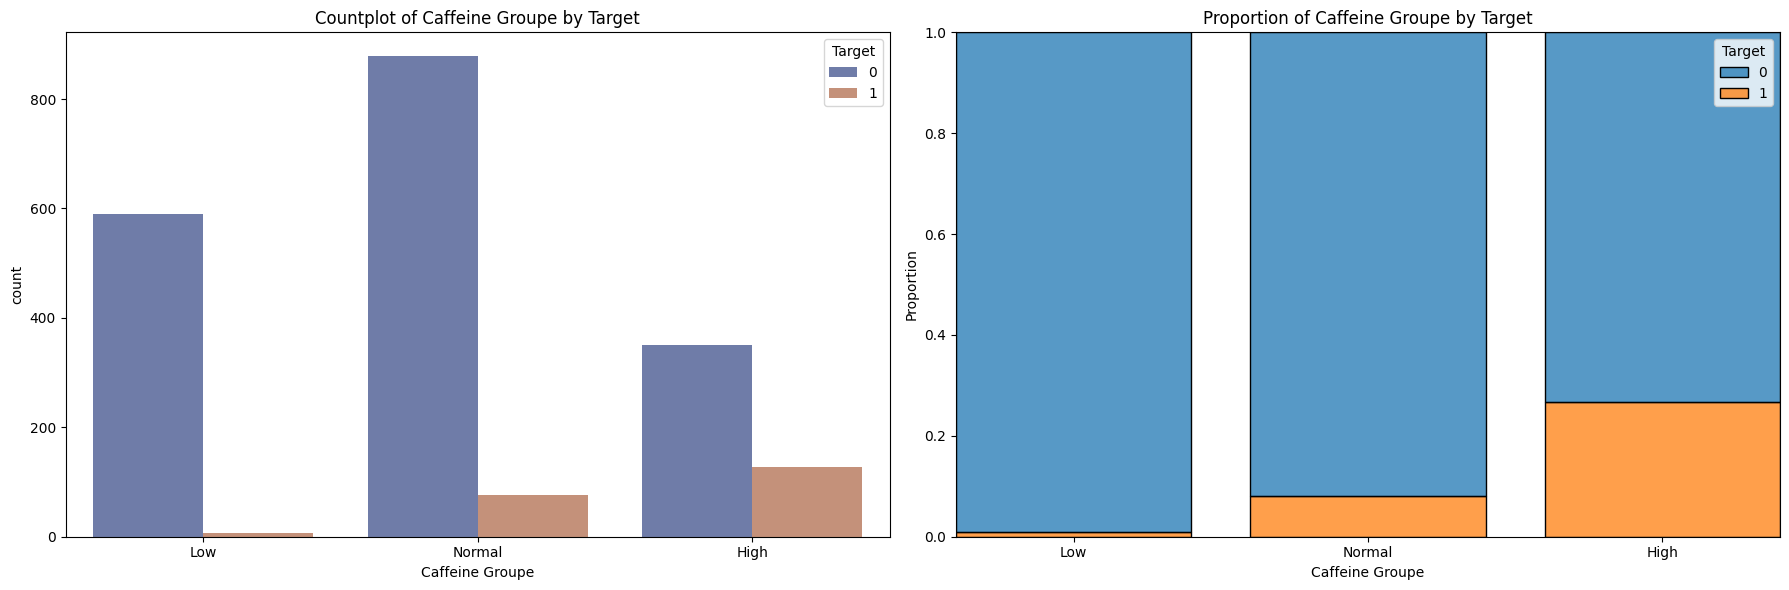

In [113]:
bins = [0,200,400, 1500]
labels = ['Low', 'Normal', 'High']
df['Caffeine Groupe'] = pd.cut(df['Caffeine Intake (mg/day)'], bins= bins, labels= labels)
bivariate_analysis(df, 'Caffeine Groupe')